# Machine Learning in python
Machine Learning is the study and application of algorithms that generate statistic models which are able to perform a specific task without being specifically coded. Those models are created by observing a set of samples and extracting and learning the patterns in samples data.

The most used library in Python to work with ML is SciKit-Learn https://scikit-learn.org/stable/. This module includes the implementations of dozens of different ML algorithms and the functions needed to handle and transform the data which will be used by the ML models.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn


If you have any problem importing those modules, you might need to install or update them. If you are using Anaconda run an Anaconda Prompot and execute `conda install [package]`, or, if you are using just Python, open a terminal and execute `pip install [package]`.

Let's load our well known researchers and publications datasets:

In [2]:
import pandas as pd
publications = pd.read_pickle("publications")
researchers = pd.read_pickle("researchers")
#publications = pd.read_json("data/publications.json")
#researchers = pd.read_json("data/researchers.json")
#publications.date = pd.to_datetime(publications.date*1e6)
data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

Some of the calculations done in this notebook could be complex and too heavy for some computers. If your computer takes too long to run the experiments, you can reduce the datasets executing the following code (uncomment it)

In [3]:
# With this method we take sample of a dataset, the parameter frac indicates the percentage of the original data we keep
#publications = publications.sample(frac=0.5)
#researchers = researchers.sample(frac=0.5)
#data = researchers.merge(publications.rename(columns={"authors":"auth_id"}).explode("auth_id"), on="auth_id")

### Train and test
The main idea behind the machine learning is that the algorithm will observe a training set of samples, which we should be sure is representative of the data we are working with. From this training set, or training data, the algorithm will learn the patterns that describes the data and generates a model which can replicate the behavior shown on them. Then, using a *different* set of samples -that we call test set or test data- we will evaluate how accurate is the generated model, basically, by measuring the difference between the model output and the correct answer. It is very important to do not use the same data to train and test the model.

Let’s see it with an example.
We will use a popular dataset in ML called iris dataset. This dataset contains a series of measures of flowers and the type of the flower (for more info check https://archive.ics.uci.edu/ml/datasets/iris). As we will see later, the task of the model we are going to create is a classification task. 
The dataset is made of observations which contains 4 numeric variables and 1 categorical target. The task of the model is to predict the target of a sample observing its numeric variables.


Model accuracy: 93.33%


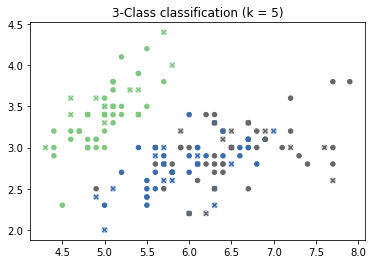

In [4]:
# This example is based in one example from the scikit learn documentation 
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
from sklearn import neighbors, datasets
from sklearn import model_selection

n_neighbors = 5

iris = datasets.load_iris()

# In this notebook we will always use x as the features vector and y as the target
X = iris.data
y = iris.target

x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size= 0.3)

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(x_train, y_train)
y_out = clf.predict(x_test)


plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Accent", s=20)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Accent", s=30, alpha=0.2)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_out, cmap="Accent", s=20, marker = "x")
plt.title("3-Class classification (k = %i)" % (n_neighbors))
print("Model accuracy: {:.2f}%".format(np.average(y_out==y_test)*100))

Although the dataset has 4 dimensions, the plot only shows 2 dimensions, easier for humans. The colors in the plot are the different types of flowers. Dots are the training data and crosses the test data, the background of each test sample is the correct type. The precision is just the accuracy of correct classifications made by the model.

### K-Fold Cross-Validation
Ensure that the partition of the data used to train the model is representative may not be an easy task. For example, in the previous dataset it could be that the data we select to train don't contain samples of one of the class, or may be that the test data were particularly easy to classify.

Cross Validation is a group of techniques that solve this problem, all of them are based on the idea of perform several trainings and testing’s using different partitions each time. The most basic, and most popular, is the K-Fold Cross Validation.
In K-Fold, we choose a number k (usually from 5 to 10), then we divide our dataset in k folds. We will train the model k times, in each iteration we will use k-1 folds as the train data and the remaining fold as test data. The evaluation of the final model is calculated as the average of the evaluations for each iteration.

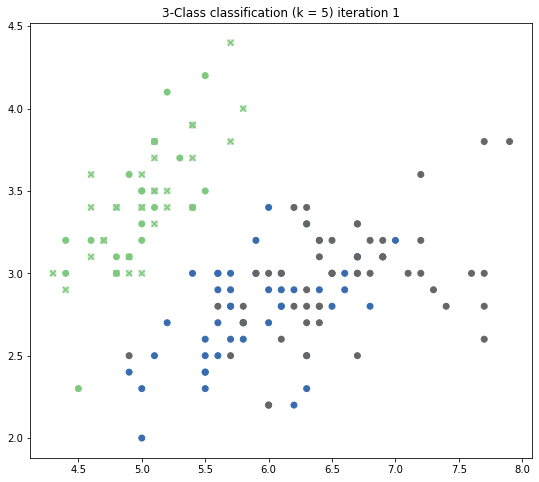

Iteration 1: Model accuracy: 100.00%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


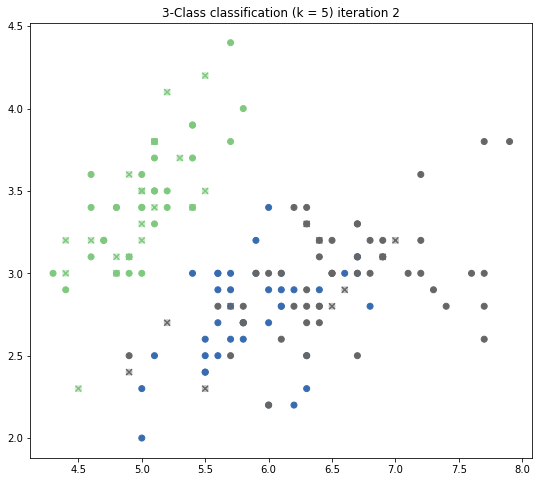

Iteration 2: Model accuracy: 100.00%
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


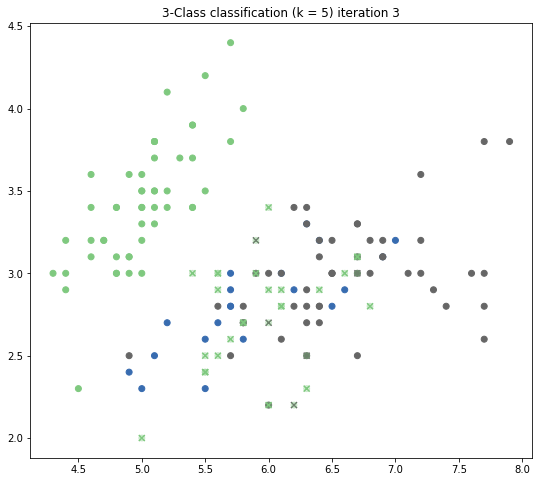

Iteration 3: Model accuracy: 83.33%
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1]


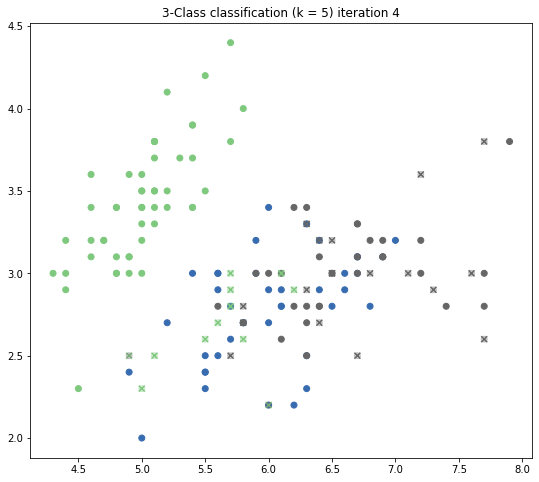

Iteration 4: Model accuracy: 93.33%
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1]


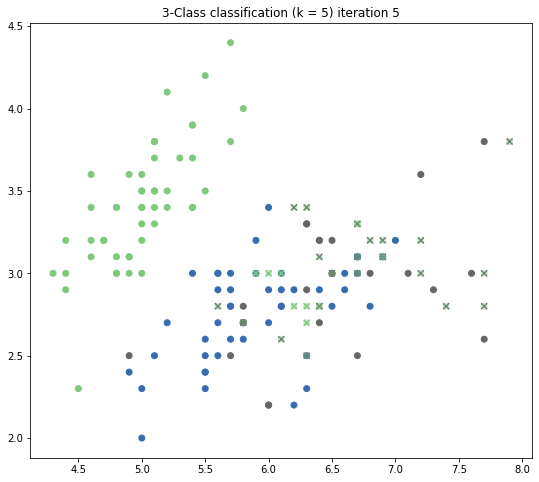

Iteration 5: Model accuracy: 80.00%
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 1]
Global accuracy: 91.33%


In [5]:
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k)
accuracies = []
i=0
for train, test in kf.split(X): # train and test are the indices of the samples that will be used in each set
    i+=1
    x_train, x_test, y_train, y_test = X[train], X[test], y[train], y[test]
    clf = neighbors.KNeighborsClassifier(n_neighbors)
    clf.fit(x_train, y_train)
    y_out = clf.predict(x_test)


    plt.figure(figsize=(9, 8))
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="Accent")
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_out, cmap="Accent", marker = "x")
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap="Accent", alpha=0.3)
    plt.title("3-Class classification (k = %i) iteration %i" % (n_neighbors,i))
    plt.show()
    accuracy = np.average(y_out==y_test)*100
    accuracies.append(accuracy)
    print("Iteration {}: Model accuracy: {:.2f}%".format(i,accuracy))
    print(y_test)
    print(y_out)
print("Global accuracy: {:.2f}%".format(np.average(accuracies)))

## Regression
Regression is one of the possible task for a ML model. The objective is to predict a numeric output based on the input. One example of this could be to predict the number of products that will be sell based on the previous sales or calculate the probability of the stock market grows tomorrow.

The most basic example of this task is to obtain the relation between two variables.

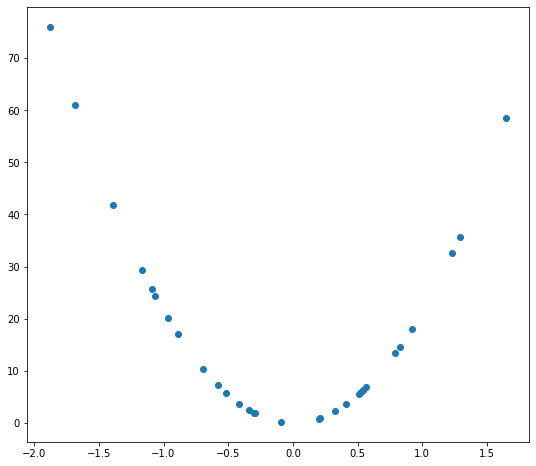

In [6]:
from sklearn import datasets
import math

x, y = datasets.make_regression(n_samples=30, n_features=1, noise=0)
# try to modify the relation between x and y or play with the noise value
y = y**2
#y = np.sin(y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.show()

Problem in the real world are more complicated, the target (variable we want to predict) usually depends on more variables (features).

In [7]:
%matplotlib qt 
# this makes that plots show in an interactive window
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x, y = datasets.make_regression(n_samples=100, n_features=2, noise= 0)
ax.scatter(x[:,0], x[:,1],y)
plt.show()

In [9]:
%matplotlib inline
# reset the plot behavior

#### Optional extra
Try to plot the iris dataset in a 3d plot

### Some popular models
There are many different algorithms or models that can be used for regression tasks. Each of them has its advantages or disadvantages for each kind of problem, but to discuss them are far beyond of the scope of this course. We will just try them with their basic configuration and keep the one that best fits our case.

#### Linear regression
This is the most basic regression model. The algorithm will just try to minimize the error in a function like $Y=aX+b$, where $Y$ is the target and $X$ the vector of features.

In [8]:
from sklearn.linear_model import LinearRegression
x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)

y=y**2
model = LinearRegression().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x,model.predict(x), "r")
plt.show()

#### Decision Tree
This model is based on a tree structure in which each node represents a decision and each leaf an output. https://en.wikipedia.org/wiki/Decision_tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
x_test= np.linspace(x.min(),x.max(), 100)[:, np.newaxis]

model = DecisionTreeRegressor().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### Random Forest
This model belongs to a category called ensemble models because it is made of the aggregation of several models. In the case of random forest, we will have a set of decision trees which will calculate an output, then the output of the random forest will be the average of those outputs.

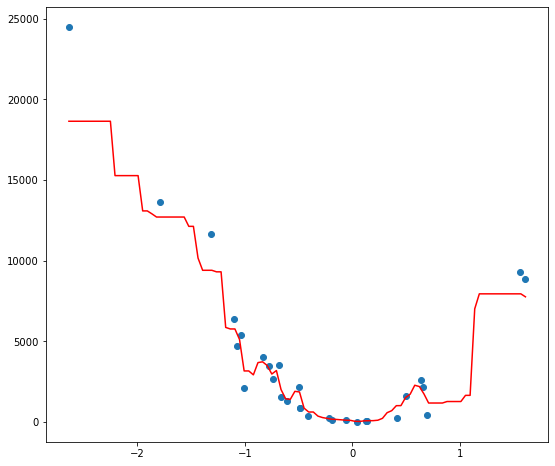

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### K Nearest Neighbors
Given an input the output of this algorithm will be the average of the $k$ nearest points in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

#### Perceptron
This is the most basic Artificial Neural Network https://en.wikipedia.org/wiki/Artificial_neural_network. Opposite  to the others models shown, this one is a "black box" and we can't see how the algorithm calculates the output.

Don't worry if you get a warning when runnig this model

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(max_iter=20000).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x, y)
plt.plot(x_test ,model.predict(x_test), "r")
plt.show()

### How to evaluate a regression model
We have trained 5 models and we can guess that some are better than others, but we need a formal way to evaluate the models. There are several ways to evaluate a regression model all of them based on the __error between the output of the model and the real answer__ when evaluating the test data, so the lower the error the better is the model. Let see some of them:

1. Max error: $max(| y_i - \hat{y}_i |)$

2. Mean absolute error or MAE: $\frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|$

3. Mean squared error or MSE: $\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2$

Don't worry about the math, scikit learn will do everything for us!

Remember about K-Folds Cross Validation when evaluate the models.

In [ ]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error
models = {"Linear Regression":LinearRegression(), \
          "Decision Tree": DecisionTreeRegressor(), \
          "Random Forest": RandomForestRegressor(n_estimators=100), \
          "Nearest Neighbors": KNeighborsRegressor(n_neighbors=5), \
          "Perceptron": MLPRegressor(max_iter=2000)}

x, y = datasets.make_regression(n_samples=30, n_features=1, noise=10)
y= y ** 2
for name in models:
    print("Start training models of {}".format(name))
    i = 0
    me_global = []
    mae_global = []
    mse_global = []
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        me = max_error(y_test, y_out)
        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        me_global.append(me)
        mae_global.append(mae)
        mse_global.append(mse)
        print("Iteration {}: me={:.4f} mae={:.4f} mse={:.4f}".format(i,me, mae, mse))
    print("Global: me={:.4f} mae={:.4f} mse={:.4f}\n".format(np.average(me_global), np.average(mae_global), np.average(mse_global)))

### Try it
Now is your turn to create a "real world" model. We will use data extracted from our researchers and publications dataset, but you have it ready to apply ML by running the next cell.

The target is to guess the number of publication of a researcher. To do that, we will use a vector of features which contains: the total number of cites of that researcher, the number of people who have cited that researcher, the number of days that this researcher has been active and the average number of cites of each of their publications. 

The task is to train some regression models using different algorithms and keep the best one. Then answer the following questions:

- Which is the best algorithm?
- Which measure have you used to select the best model?
- Do you think that the best model is a "good" regression model? Why?

In [17]:
# Data preprocessing
data.dropna(subset=["auth_id", "publications", "cited_by", "date", "cited_count","citations"], inplace=True)
# Get the average number of citations, the first and last publication for each researcher
data_agg = data[["auth_id", "publications", "cited_by", "date", "cited_count","citations"]] \
    .groupby("auth_id", as_index=False) \
    .agg({"publications":"first", "cited_by":"first", "date":["max", "min"], "cited_count": "mean", "citations":"first"})
data_agg.columns = ["auth_id", "publications", "cited_by", "date_max", "date_min", "avg_cited_count", "citations"]
data_agg["active"] = data_agg.date_max-data_agg.date_min #Calculate active time
data_agg.active = data_agg.active.apply(lambda x: x.days)

# Features
x = data_agg[["citations", "cited_by", "active", "avg_cited_count"]].values

# Target
y = data_agg.publications.values

In [18]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error, max_error
models = {"Linear Regression":LinearRegression(), \
          "Decision Tree": DecisionTreeRegressor(), \
          "Random Forest": RandomForestRegressor(n_estimators=100), \
          "Nearest Neighbors": KNeighborsRegressor(n_neighbors=5), \
          "Perceptron": MLPRegressor(max_iter=2000)}


for name in models:
    print("Start training models of {}".format(name))
    i = 0
    me_global = []
    mae_global = []
    mse_global = []
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        me = max_error(y_test, y_out)
        mae = mean_absolute_error(y_test, y_out)
        mse = mean_squared_error(y_test, y_out)
        me_global.append(me)
        mae_global.append(mae)
        mse_global.append(mse)
        print("Iteration {}: me={:.4f} mae={:.4f} mse={:.4f}".format(i,me, mae, mse))
    print("Global: me={:.4f} mae={:.4f} mse={:.4f}\n".format(np.average(me_global), np.average(mae_global), np.average(mse_global)))

Start training models of Linear Regression
Iteration 1: me=179.5227 mae=9.9494 mse=351.2287
Iteration 2: me=105.1439 mae=6.2628 mse=144.7371
Iteration 3: me=247.0924 mae=4.3106 mse=164.3498
Iteration 4: me=80.2515 mae=2.5392 mse=39.6151
Iteration 5: me=116.0706 mae=2.2504 mse=27.3949
Global: me=145.6162 mae=5.0625 mse=145.4651

Start training models of Decision Tree
Iteration 1: me=169.0000 mae=3.4396 mse=155.0429
Iteration 2: me=76.0000 mae=1.5945 mse=24.2918
Iteration 3: me=123.0000 mae=1.1304 mse=32.1401
Iteration 4: me=125.0000 mae=0.6805 mse=20.1130
Iteration 5: me=32.0000 mae=0.3179 mse=1.4628
Global: me=105.0000 mae=1.4326 mse=46.6101

Start training models of Random Forest
Iteration 1: me=129.4100 mae=2.2483 mse=84.0536
Iteration 2: me=44.1400 mae=0.9845 mse=11.9951
Iteration 3: me=120.6000 mae=0.8958 mse=36.3898
Iteration 4: me=108.7600 mae=0.5315 mse=12.8652
Iteration 5: me=54.3400 mae=0.3377 mse=4.4474
Global: me=91.4500 mae=0.9996 mse=29.9502

Start training models of Neare

In [ ]:
# mejor algoritmo: Random Forest
# medida elegida: las tres, para hacer mejor la comparativa entre los algoritmos
# es mejor que los otros pero no es del todo bueno, porque tiene bastante error maximo

## Classification
Another common task in ML is classification, in this case the target will be a class or a categorical variable, like in the iris dataset.

When talking about classifications task there are two possibilities: the target can only be positive or negative (binary classification) or the target can be any class of a set of categories (multi class).

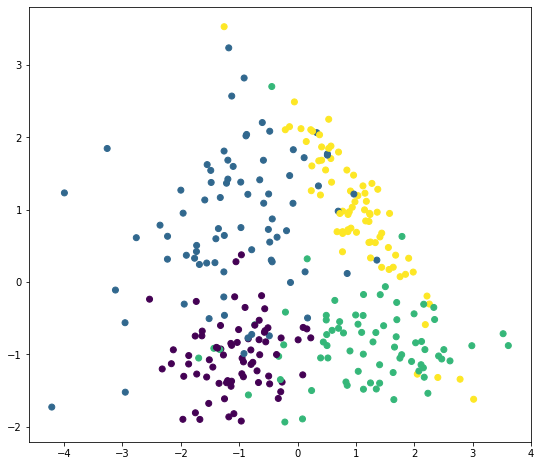

In [19]:
x, y = datasets.make_classification(n_samples=300, n_features=2,n_classes=4,n_redundant=0,n_clusters_per_class=1)
# try to modify the relation between x and y or play with the noise value
#y = y**2
#y = np.sin(y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()

In [20]:
%matplotlib qt 
# this makes that plots show in an interactive window
fig = plt.figure()
ax = Axes3D(fig)
x, y = datasets.make_classification(n_samples=300, n_features=3,n_classes=4,n_redundant=0,n_clusters_per_class=1)
ax.scatter(x[:,0], x[:,1], x[:,2],c=y)
plt.show()

In [21]:
%matplotlib inline
# reset the plot behavior

### Some popular models
Like in the case of regression there are a lot of algorithms for classification. Many of them have implementations both for regression or classification. 

In the following plots, the decision regions will be plotted. Those are the regions that the model will use to perform the classification, an input will be classified depending on which region it appears.

#### Logistic regression
Don't be misleading with the regression word, this model can only be used for classification.

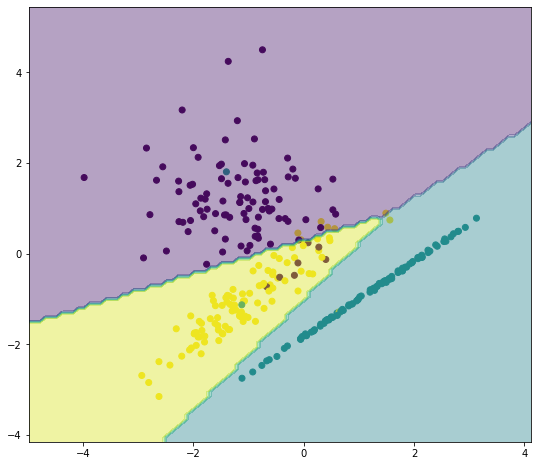

In [22]:
from sklearn.linear_model import LogisticRegression

x, y = datasets.make_classification(n_samples=300, n_features=2,n_classes=3,n_redundant=0,n_clusters_per_class=1)

# For decision regions
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

model = LogisticRegression(multi_class="auto", solver="lbfgs").fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Decision Tree

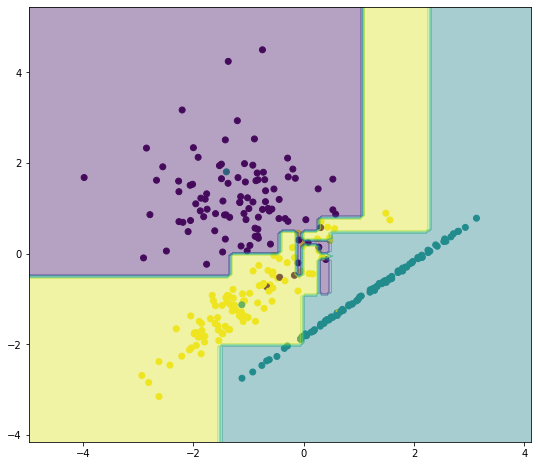

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Random Forest

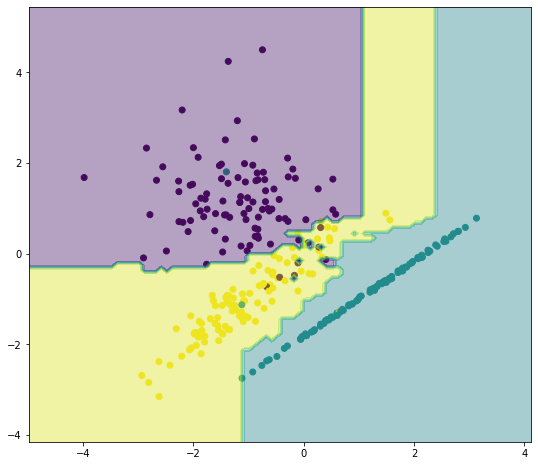

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### K Nearest Neighbors

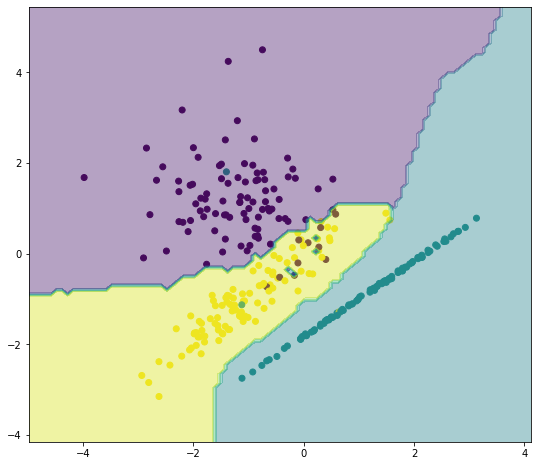

In [25]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

#### Perceptron

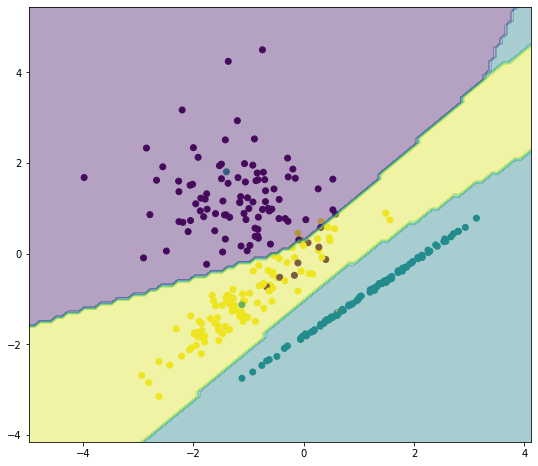

In [26]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(max_iter=2000).fit(x,y)
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.show()

### How to evaluate a classification model
In this case the output is a class or a label, so we can't calculate the error, instead we will calculate a ratio between the number of times that the output is correct and another count of the outputs, the total number or the number of wrong outputs for example. For example, the most intuitive way to evaluate a classification model is the accuracy : How many times my model guess the correct answer over all the anwsers?. But, even if this can be useful in some cases, in practice, it is not an informative measure.

### Confusion matrix
This is the main tool to evaluate a classification model https://en.wikipedia.org/wiki/Confusion_matrix. It is defined as:

"By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$."

In other words it is a matrix where columns represents the true class and the rows the output class. With it we can know how many samples have been correctly classified and which classes can be confused.


In the case of binary classification, the matrix has only 2 columns and 2 rows, and each of the cells has a proper name.

There are some metrics obtained from these cells:
1. Accuracy: the ratio of correctly predicted over the total of samples $\frac{TP+TN}{TP+FP+TN+FN}$
2. Precision: the ratio of correctly positive predicted over all predicted as positive $\frac{TP}{TP+FP}$
3. Recall: the ratio between positive predicted and the total of positive samples $\frac{TP}{TP+FN}$
4. F1 score: harmonic mean of precision and recall $\frac{Precision*Recall}{Precision+Recall}=\frac{2*TP}{2*TP+FP+FN}$

Usually more complex metrics are used, but for this course the F1 score is enough. And again, don't worry, scikit learn includes all these calculations.

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

models = {"Logistic Regression":LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=2000), \
          "Decision Tree": DecisionTreeClassifier(), \
          "Random Forest": RandomForestClassifier(n_estimators=100), \
          "Nearest Neighbors": KNeighborsClassifier(n_neighbors=5), \
          "Perceptron": MLPClassifier(max_iter=2000)}

x, y = datasets.make_classification(n_samples=300)

for name in models:
    print("Start training models of {}".format(name))
    i = 0
    f1_global = []
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        f1_global.append(f1_score(y_test, y_out, average="weighted"))
        print(confusion_matrix(y_test, y_out))
        print(classification_report(y_test, y_out))
    print("Global: f1={:.4f}\n".format(np.average(f1_global)))

Start training models of Logistic Regression
[[29  2]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87        31
           1       0.92      0.76      0.83        29

    accuracy                           0.85        60
   macro avg       0.86      0.85      0.85        60
weighted avg       0.86      0.85      0.85        60

[[28  3]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.90      0.97      0.93        29

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.94      0.93      0.93        60

[[32  2]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.93      0.96      0.94        26

    accuracy                           0.95        60
   macro avg       0.95   

[[27  2]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.88        31

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

[[21  3]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.92      0.97      0.95        36

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60

Global: f1=0.9030



### Try it
In the next cell you can find a code to generate labeled vectors obtained from the publications dataset. As we have a label we can use this data to train a classification model. The label will be the type of a publication, and the features vector will contains: the number of pages, the number of authors, the title's lenght and the number of citations. Find wich is the model that works better with this data and answer the following questions:

- Which is the best algorithm?
- What is the average F1 score for that algorithm?
- Which is the publication type most difficult to classify?
- Whit which publication type are most often confused the articles?
- Which publication type is usually missclassified as article?

In [28]:
# Data preprocessing
import re
from sklearn import preprocessing

publications.dropna(subset=["pages", "authors", "title","type","cited_count"], inplace = True) #Remove publications without needed data
publications["nauthors"] = publications.authors.apply(len) # Calculate number of authors
publications["ltitle"] = publications.title.apply(len) # Calculate title length
publications = publications.loc[publications.type.isin(["Article", "Chapter", "Conference Paper", "Review"])]
#Features
x = publications[["pages", "nauthors", "ltitle", "cited_count"]].values

#Labels
y_labels = publications.type.values
enc = preprocessing.LabelEncoder().fit(y_labels)
y = enc.transform(y_labels)

for i in range(len(enc.classes_)):
    print("Class {} encoded as {}".format(enc.classes_[i], i))

Class Article encoded as 0
Class Chapter encoded as 1
Class Conference Paper encoded as 2
Class Review encoded as 3


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

models = {"Logistic Regression":LogisticRegression(multi_class="auto", solver="lbfgs", max_iter=2000), \
          "Decision Tree": DecisionTreeClassifier(), \
          "Random Forest": RandomForestClassifier(n_estimators=100), \
          "Nearest Neighbors": KNeighborsClassifier(n_neighbors=5), \
          "Perceptron": MLPClassifier(max_iter=2000)}


for name in models:
    print("Start training models of {}".format(name))
    i = 0
    f1_global = []
    for train, test in kf.split(x):
        i+=1
        x_train, x_test, y_train, y_test = x[train], x[test], y[train], y[test]
        model = models[name].fit(x_train,y_train)
        y_out = model.predict(x_test)
        # We have to provide the real value of the target and the model's output
        f1_global.append(f1_score(y_test, y_out, average="weighted"))
        print(confusion_matrix(y_test, y_out))
        print(classification_report(y_test, y_out))
    print("Global: f1={:.4f}\n".format(np.average(f1_global)))

Start training models of Logistic Regression
[[3329    0    1    0]
 [ 131    0    0    0]
 [2306    0    8    0]
 [ 100    0    0    1]]
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3330
           1       0.00      0.00      0.00       131
           2       0.89      0.00      0.01      2314
           3       1.00      0.01      0.02       101

    accuracy                           0.57      5876
   macro avg       0.61      0.25      0.19      5876
weighted avg       0.69      0.57      0.41      5876



J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3519    0    7    0]
 [ 113    0    0    0]
 [2118    0    3    0]
 [ 115    0    0    1]]
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      3526
           1       0.00      0.00      0.00       113
           2       0.30      0.00      0.00      2121
           3       1.00      0.01      0.02       116

    accuracy                           0.60      5876
   macro avg       0.47      0.25      0.19      5876
weighted avg       0.49      0.60      0.45      5876



J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score 

[[4039    0    4    0]
 [ 106    0    1    0]
 [1607    0    3    0]
 [ 115    0    1    0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      4043
           1       0.00      0.00      0.00       107
           2       0.33      0.00      0.00      1610
           3       0.00      0.00      0.00       116

    accuracy                           0.69      5876
   macro avg       0.26      0.25      0.20      5876
weighted avg       0.57      0.69      0.56      5876

[[4105    0    3    0]
 [ 135    0    0    0]
 [1496    0    1    0]
 [ 135    0    0    0]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      4108
           1       0.00      0.00      0.00       135
           2       0.25      0.00      0.00      1497
           3       0.00      0.00      0.00       135

    accuracy                           0.70      5875
   macro avg       0.24      0.25      0.21      5875

J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[3891    0    0    0]
 [ 188    0    0    0]
 [1581    0    0    0]
 [ 215    0    0    0]]
              precision    recall  f1-score   support

           0       0.66      1.00      0.80      3891
           1       0.00      0.00      0.00       188
           2       0.00      0.00      0.00      1581
           3       0.00      0.00      0.00       215

    accuracy                           0.66      5875
   macro avg       0.17      0.25      0.20      5875
weighted avg       0.44      0.66      0.53      5875

Global: f1=0.5059

Start training models of Decision Tree
[[2485   39  662  144]
 [  73   23   31    4]
 [1200   37 1040   37]
 [  71    4   16   10]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.69      3330
           1       0.22      0.18      0.20       131
           2       0.59      0.45      0.51      2314
           3       0.05      0.10      0.07       101

    accuracy                           0.61      

J:\Archivos de programa\Anaconda\envs\apsv\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4043
           1       0.16      0.18      0.17       107
           2       0.44      0.48      0.46      1610
           3       0.05      0.06      0.05       116

    accuracy                           0.64      5876
   macro avg       0.35      0.36      0.36      5876
weighted avg       0.65      0.64      0.65      5876

[[2929   66  996  117]
 [  75   25   24   11]
 [ 732   29  715   21]
 [  95    5   25   10]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      4108
           1       0.20      0.19      0.19       135
           2       0.41      0.48      0.44      1497
           3       0.06      0.07      0.07       135

    accuracy                           0.63      5875
   macro avg       0.36      0.36      0.36      5875
weighted avg       0.64      0.63      0.63      5875

[[2592  126 1087   86]
 [  91   35   

In [ ]:
# Which is the best algorithm?
# mejor algoritmo: perceptron
# What is the average F1 score for that algorithm?
# f1=0,6831
# Which is the publication type most difficult to classify?
# Review
# Whit which publication type are most often confused the articles?
# Conference paper
# Which publication type is usually missclassified as article?
# Review